In [1]:
%pip install networkx

Note: you may need to restart the kernel to use updated packages.


=== EXERCICE 1 ===


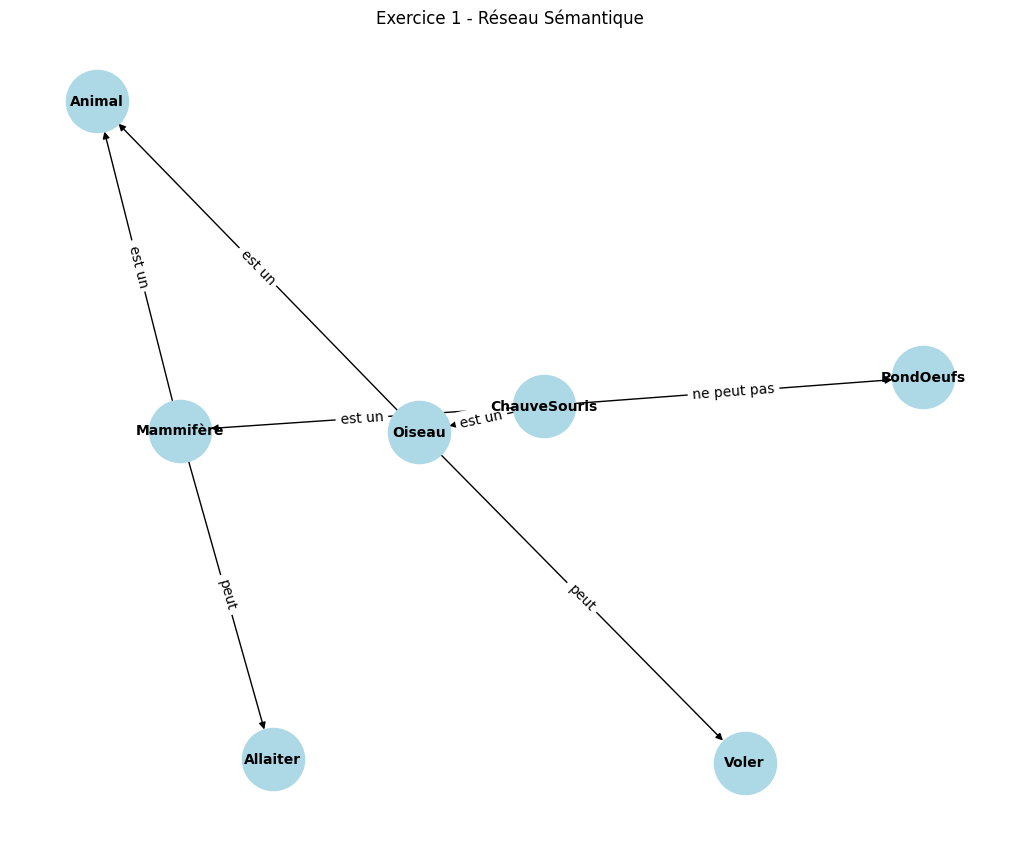


2) Propriétés héritées par la chauve-souris:
- Peut voler (hérité de Oiseau)
- Peut allaiter (hérité de Mammifère)

3) Conflits:
- Conflit d'héritage: Chauve-souris hérite de Oiseau et Mammifère
- Exception: Chauve-souris ne pond pas d'œufs (contredit Oiseau typique)


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_network(G, title):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=2000, font_size=10, font_weight='bold')
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.show()

# Exercice 1
print("=== EXERCICE 1 ===")
G1 = nx.DiGraph()

# Ajout des nœuds et relations
G1.add_edges_from([
    ('Oiseau', 'Animal', {'label': 'est un'}),
    ('Mammifère', 'Animal', {'label': 'est un'}),
    ('ChauveSouris', 'Mammifère', {'label': 'est un'}),
    ('ChauveSouris', 'Oiseau', {'label': 'est un'})
])

# Propriétés
G1.add_edges_from([
    ('Oiseau', 'Voler', {'label': 'peut'}),
    ('Mammifère', 'Allaiter', {'label': 'peut'}),
    ('ChauveSouris', 'PondOeufs', {'label': 'ne peut pas'})
])

plot_network(G1, "Exercice 1 - Réseau Sémantique")

# Héritage de la chauve-souris
print("\n2) Propriétés héritées par la chauve-souris:")
print("- Peut voler (hérité de Oiseau)")
print("- Peut allaiter (hérité de Mammifère)")

print("\n3) Conflits:")
print("- Conflit d'héritage: Chauve-souris hérite de Oiseau et Mammifère")
print("- Exception: Chauve-souris ne pond pas d'œufs (contredit Oiseau typique)")


=== EXERCICE 1 ===


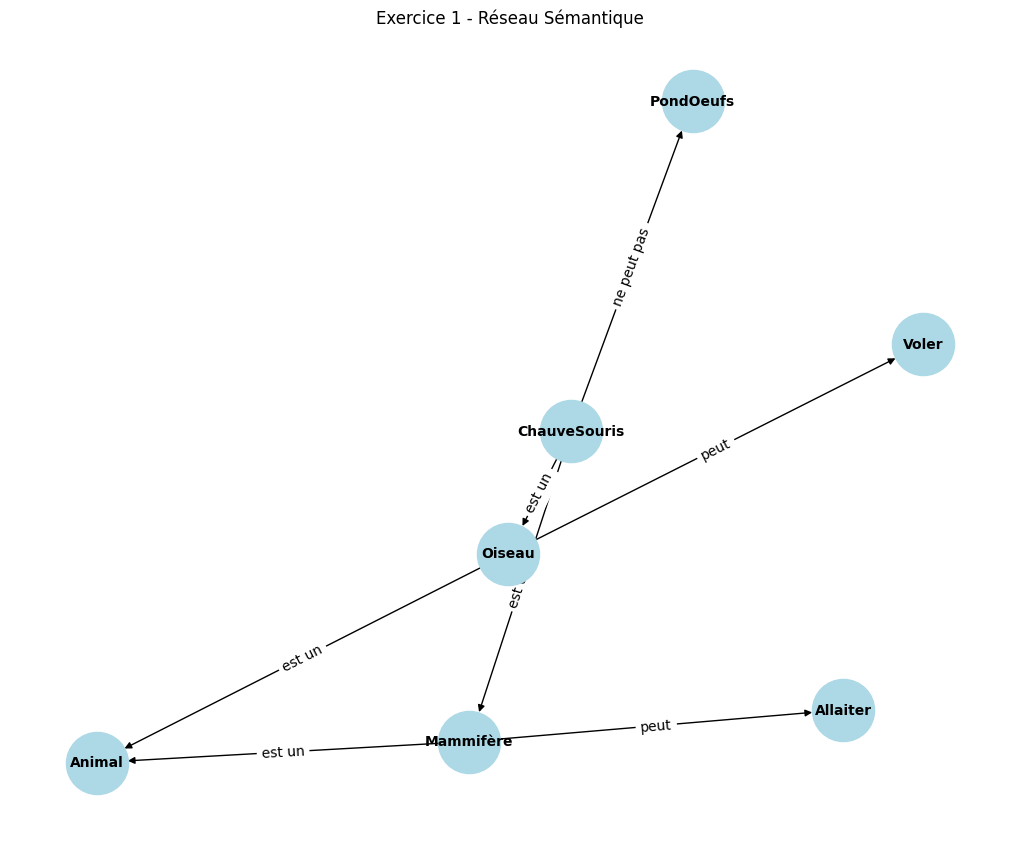


2) Propriétés héritées par la chauve-souris:
- Peut voler (hérité de Oiseau)
- Peut allaiter (hérité de Mammifère)

3) Conflits:
- Conflit d'héritage: Chauve-souris hérite de Oiseau et Mammifère
- Exception: Chauve-souris ne pond pas d'œufs (contredit Oiseau typique)

=== EXERCICE 2 ===


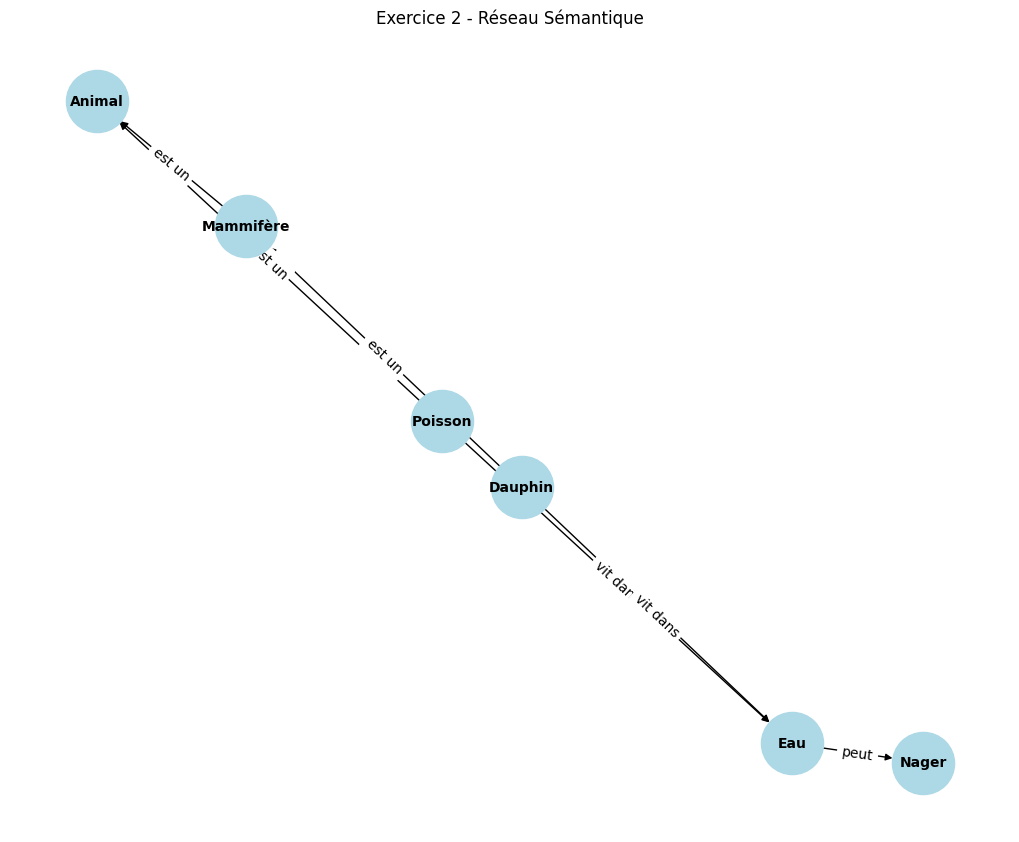

Démonstration que les dauphins peuvent nager:
Dauphin → Mammifère → Animal
Dauphin vit dans Eau
Animal qui vit dans Eau peut Nager
∴ Dauphin peut Nager

=== EXERCICE 3 ===


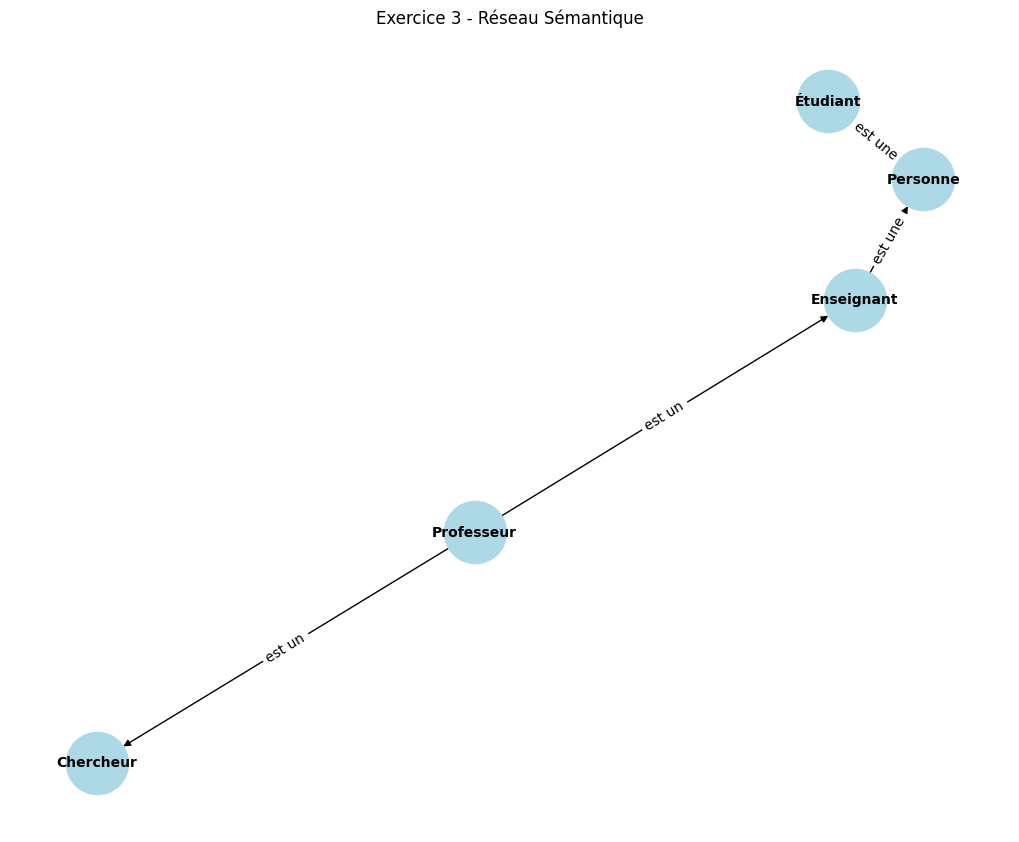


2) Type de contrainte:
Contrainte d'intégrité: Le domaine enseigné doit être le même que le domaine étudié

=== EXERCICE 4 ===
Propagation d'activation depuis 'Chien':
Chien: 1.000
Animal: 0.500
Os: 0.500
Chat: 0.250
ÊtreVivant: 0.250
Nourriture: 0.250
Lait: 0.125

=== EXERCICE 5 ===
Propriétés de Pingouin:
- Est un Oiseau
- Ne peut pas voler (exception)
- Pas de propriété nocturne

Propriétés de Hibou:
- Est un OiseauNocturne → Oiseau
- Peut voler (hérité de Oiseau)
- Chasse la nuit (hérité de OiseauNocturne)
- Ne vit pas dans l'eau (propriété spécifique)

=== EXERCICE 6 ===


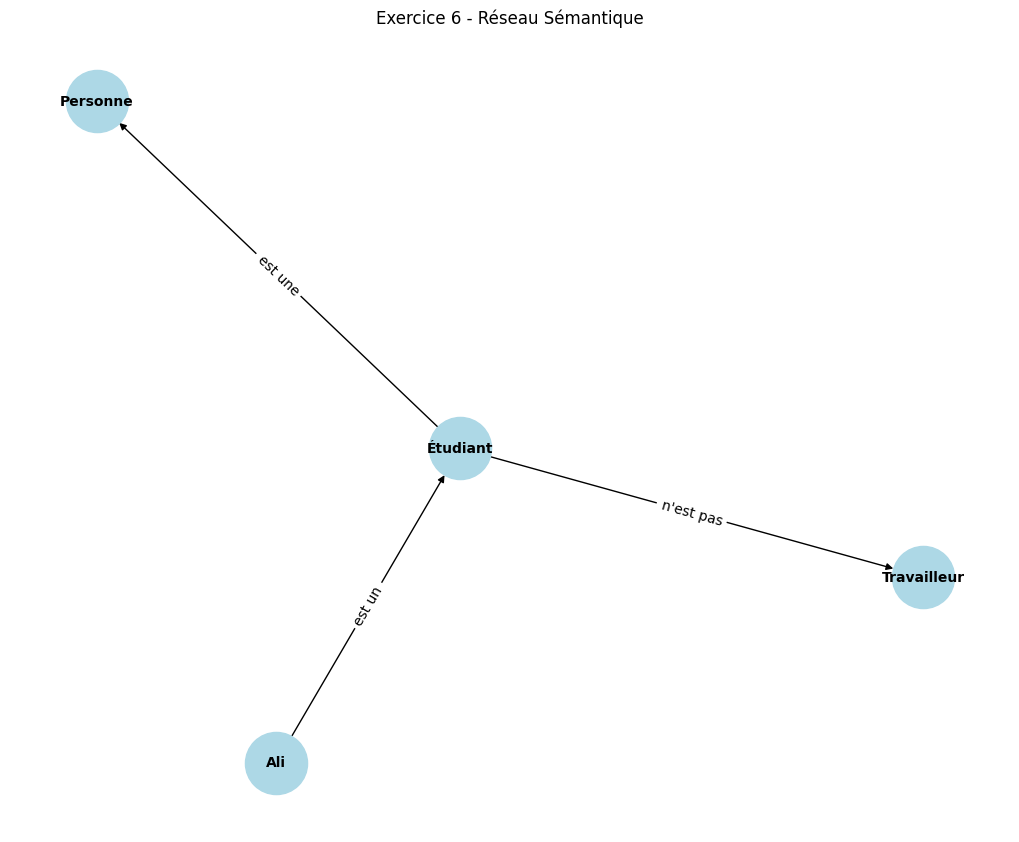

Traduction en réseau sémantique:
Étudiant → Personne
Étudiant → ¬Travailleur
Ali → Étudiant

=== EXERCICE 7 ===


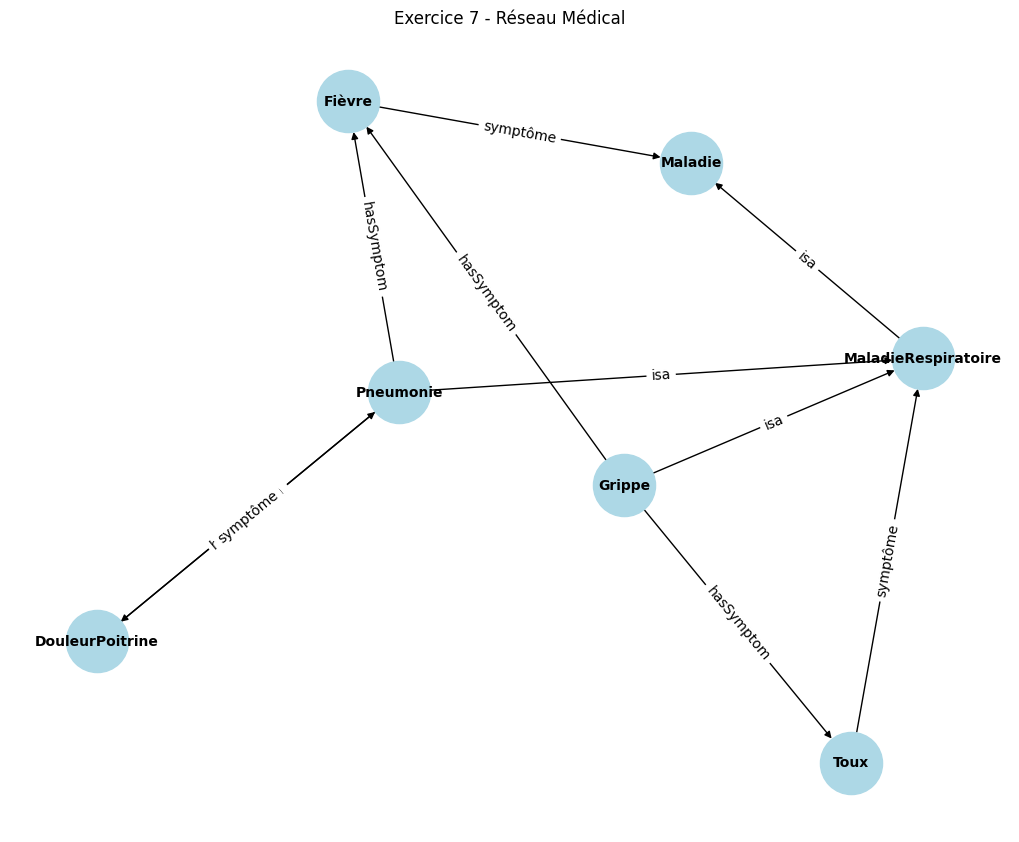

Maladies possibles pour fièvre + toux:
1. Grippe (fièvre + toux)
2. Pneumonie (fièvre + toux + douleur poitrine)
Conclusion: Grippe est plus probable (moins de symptômes manquants)


In [ ]:

# Exercice 2
print("\n=== EXERCICE 2 ===")
G2 = nx.DiGraph()

G2.add_edges_from([
    ('Poisson', 'Animal', {'label': 'est un'}),
    ('Dauphin', 'Mammifère', {'label': 'est un'}),
    ('Mammifère', 'Animal', {'label': 'est un'}),
    ('Poisson', 'Eau', {'label': 'vit dans'}),
    ('Dauphin', 'Eau', {'label': 'vit dans'}),
    ('Eau', 'Nager', {'label': 'peut'})
])

plot_network(G2, "Exercice 2 - Réseau Sémantique")

print("Démonstration que les dauphins peuvent nager:")
print("Dauphin → Mammifère → Animal")
print("Dauphin vit dans Eau")
print("Animal qui vit dans Eau peut Nager")
print("∴ Dauphin peut Nager")

# Exercice 3
print("\n=== EXERCICE 3 ===")
G3 = nx.DiGraph()

G3.add_edges_from([
    ('Étudiant', 'Personne', {'label': 'est une'}),
    ('Enseignant', 'Personne', {'label': 'est une'}),
    ('Professeur', 'Enseignant', {'label': 'est un'}),
    ('Professeur', 'Chercheur', {'label': 'est un'})
])

# Attributs
G3.nodes['Personne']['attributs'] = ['âge']
G3.nodes['Étudiant']['attributs'] = ['domaine_étudié']
G3.nodes['Enseignant']['attributs'] = ['domaine_enseigné']

plot_network(G3, "Exercice 3 - Réseau Sémantique")

print("\n2) Type de contrainte:")
print("Contrainte d'intégrité: Le domaine enseigné doit être le même que le domaine étudié")

# Exercice 4 - Propagation d'activation
print("\n=== EXERCICE 4 ===")
G4 = nx.Graph()

G4.add_edges_from([
    ('Chien', 'Animal'),
    ('Chat', 'Animal'), 
    ('Animal', 'ÊtreVivant'),
    ('Chien', 'Os'),
    ('Chat', 'Lait'),
    ('Os', 'Nourriture')
])

def propagation_activation(G, noeud_initial, niveau=3, facteur=0.5):
    activation = {noeud: 0 for noeud in G.nodes()}
    activation[noeud_initial] = 1.0
    
    for i in range(niveau):
        new_activation = activation.copy()
        for noeud in G.nodes():
            if activation[noeud] > 0:
                for voisin in G.neighbors(noeud):
                    new_activation[voisin] = max(new_activation[voisin], 
                                               activation[noeud] * facteur)
        activation = new_activation
    
    return activation

resultat = propagation_activation(G4, 'Chien', niveau=3, facteur=0.5)
print("Propagation d'activation depuis 'Chien':")
for noeud, activ in sorted(resultat.items(), key=lambda x: -x[1]):
    print(f"{noeud}: {activ:.3f}")

# Exercice 5
print("\n=== EXERCICE 5 ===")
G5 = nx.DiGraph()

G5.add_edges_from([
    ('Hibou', 'OiseauNocturne', {'label': 'est un'}),
    ('Pingouin', 'Oiseau', {'label': 'est un'}),
    ('OiseauNocturne', 'Oiseau', {'label': 'est un'})
])

# Propriétés avec exceptions
print("Propriétés de Pingouin:")
print("- Est un Oiseau")
print("- Ne peut pas voler (exception)")
print("- Pas de propriété nocturne")

print("\nPropriétés de Hibou:")
print("- Est un OiseauNocturne → Oiseau")
print("- Peut voler (hérité de Oiseau)")
print("- Chasse la nuit (hérité de OiseauNocturne)")
print("- Ne vit pas dans l'eau (propriété spécifique)")

# Exercice 6
print("\n=== EXERCICE 6 ===")
G6 = nx.DiGraph()

G6.add_edges_from([
    ('Étudiant', 'Personne', {'label': 'est une'}),
    ('Étudiant', 'Travailleur', {'label': 'n\'est pas'}),
    ('Ali', 'Étudiant', {'label': 'est un'})
])

plot_network(G6, "Exercice 6 - Réseau Sémantique")

print("Traduction en réseau sémantique:")
print("Étudiant → Personne")
print("Étudiant → ¬Travailleur") 
print("Ali → Étudiant")

# Exercice 7
print("\n=== EXERCICE 7 ===")
G7 = nx.DiGraph()

G7.add_edges_from([
    ('Grippe', 'MaladieRespiratoire', {'label': 'isa'}),
    ('Pneumonie', 'MaladieRespiratoire', {'label': 'isa'}),
    ('MaladieRespiratoire', 'Maladie', {'label': 'isa'})
])

# Symptômes
G7.add_edges_from([
    ('Fièvre', 'Maladie', {'label': 'symptôme'}),
    ('Toux', 'MaladieRespiratoire', {'label': 'symptôme'}),
    ('DouleurPoitrine', 'Pneumonie', {'label': 'symptôme'})
])

# HasSymptom
G7.add_edges_from([
    ('Grippe', 'Fièvre', {'label': 'hasSymptom'}),
    ('Grippe', 'Toux', {'label': 'hasSymptom'}),
    ('Pneumonie', 'Fièvre', {'label': 'hasSymptom'}),
    ('Pneumonie', 'DouleurPoitrine', {'label': 'hasSymptom'})
])

plot_network(G7, "Exercice 7 - Réseau Médical")

print("Maladies possibles pour fièvre + toux:")
print("1. Grippe (fièvre + toux)")
print("2. Pneumonie (fièvre + toux + douleur poitrine)")
print("Conclusion: Grippe est plus probable (moins de symptômes manquants)")